# Filling gaps with noise

In [4]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

################# DEFINES THE MEDIAN ABSOLUTE DEVIATION    
def mad(xin = 0):
    """
    Estimate the noise in the data
    returns the sigma of the noise
    """
    z = np.median(abs(xin - np.median(xin)))/0.6735
    
    return z

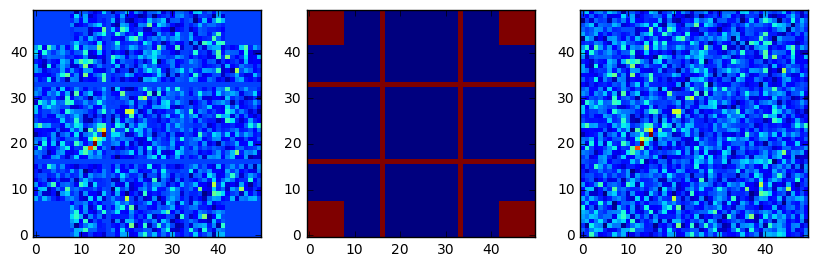

In [33]:
cube_init = fits.getdata('cube_event_19.fits').T

im =cube_init.sum(axis=2)



def fill_gaps(im):
    
    mask = (im == 0) # regions with gaps
    
    gaps = np.zeros_like(im)
    gaps[mask]=1
    
    im_inpaint = im.copy()

    noise = mad(im[np.invert(mask)]) # estimating noise on non-zero regions
    im_inpaint[mask] = np.random.normal(loc=0,scale=noise,size=len(np.where(mask)[0]))
    
    return gaps,im_inpaint

gaps,im_inpaint = fill_gaps2(im)

fig, ax = plt.subplots(ncols=3,nrows=1,figsize=(10,5))


low=np.min(im) ; high=np.max(im)
ax[0].imshow(im,vmin=low,vmax=high)
ax[1].imshow(gaps)
ax[2].imshow(im_inpaint,vmin=low,vmax=high)
plt.show()

# Testing the MAD estimator for noise

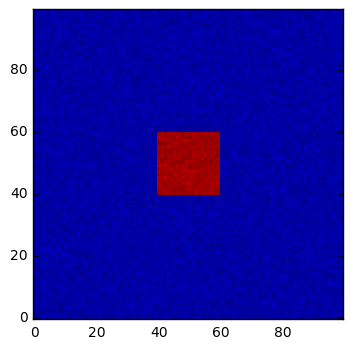

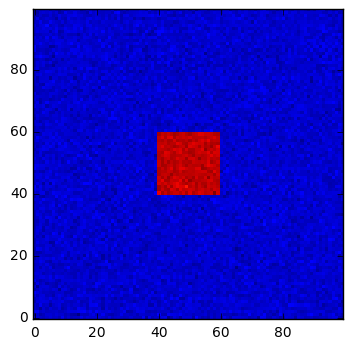

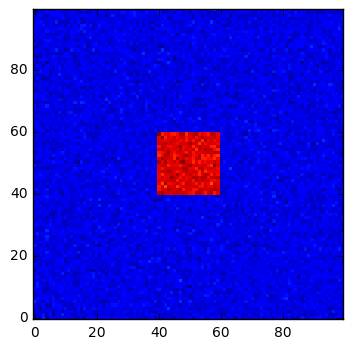

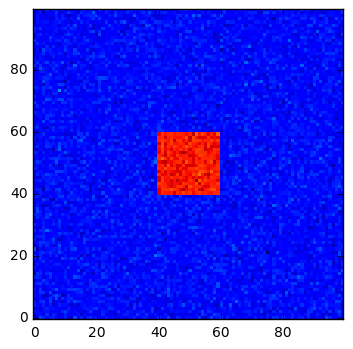

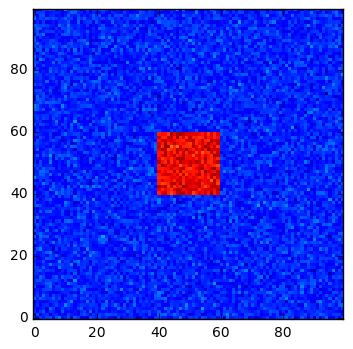

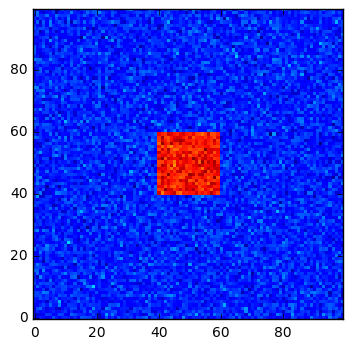

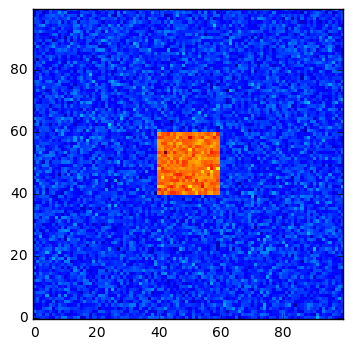

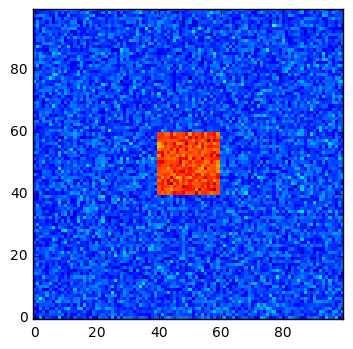

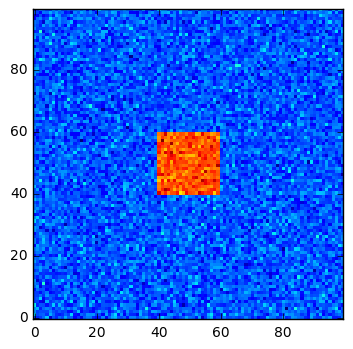

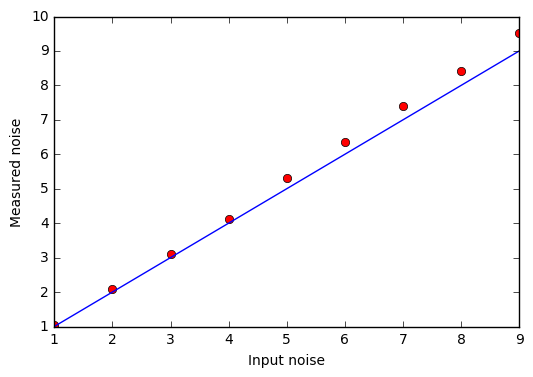

In [58]:
scales=np.arange(1,10)
std=[]

for scale in scales:
    im = np.zeros((100,100))
    im[40:60,40:60] = 100
    im = np.random.normal(im,scale=scale)
    std.append(mad(im) )
#    std.append(np.std(im) )
    plt.imshow(im)
    plt.show()
    
plt.plot(scales,std,'ro')
plt.plot(scales,scales)

plt.xlabel('Input noise')
plt.ylabel('Measured noise')

plt.show()